In [1]:
import sys
import pandas as pd
import joblib
from sklearn.metrics import roc_curve
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
from allennlp.commands.elmo import ElmoEmbedder

In [2]:
sys.path.append("..") # adds twitter_sentiment path

In [3]:
from twitter_sentiment.preprocessors.utils import read_jsonlines_lzma
from twitter_sentiment.preprocessors.distant_supervision import extract_tweets_tokenized_text_and_Y

# Word2Vec

In [11]:
distant_dataset = "../data/output/all_deduplicated-pt-tagged.jsonline.xz"
tweets = read_jsonlines_lzma(distant_dataset)
_, X, Y = extract_tweets_tokenized_text_and_Y(tweets)

In [71]:
seq_len = np.array([len(x) for x in X])

In [72]:
len(set(seq_len))

167

In [125]:
plt.rcParams.update({'font.size': 18})

In [137]:
threshold = int(np.percentile(seq_len, 95))

In [138]:
threshold

42

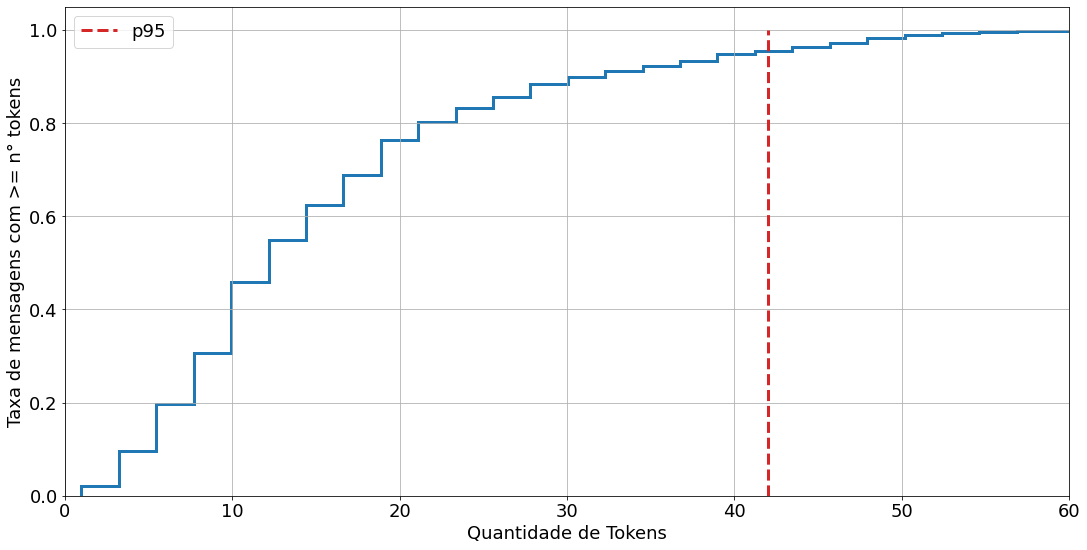

In [136]:
plt.figure(figsize=(18,9))
plt.hist(seq_len, bins=200, density=True, cumulative=True, label='', linewidth=3, histtype='step', color='#1f77b4')
plt.vlines(int(np.percentile(seq_len, 95)), ymin=0, ymax=1, linewidth=3, linestyles='dashed', label='p95', colors='#d62728')
plt.xlim((0, 60))
plt.legend(loc='upper left')
plt.xlabel("Quantidade de Tokens")
plt.ylabel("Taxa de mensagens com >= n° tokens")
plt.grid(which="both")
plt.show()

# ELMo

In [7]:
distant_dataset = "../data/output/all_deduplicated-pt-tagged.jsonline.xz"
tweets = read_jsonlines_lzma(distant_dataset)
_, X, Y = extract_tweets_tokenized_text_and_Y(tweets)

In [8]:
options_file = "https://s3-us-west-2.amazonaws.com/allennlp/models/elmo/contributed/pt/wikipedia/options.json"
weight_file = "https://s3-us-west-2.amazonaws.com/allennlp/models/elmo/contributed/pt/wikipedia/elmo_pt_weights.hdf5"
embedder = ElmoEmbedder(options_file=options_file, weight_file=weight_file, cuda_device=-1) # run on cpu

In [16]:
elmo_tokens_len = []

In [13]:
indexes = np.arange(len(X))
np.random.shuffle(indexes)

In [19]:
for i in tqdm(indexes[0:10_000]):
    elmo_tokens_len.append(embedder.embed_sentence(X[i]).shape[1])
    total_it += 1

100%|██████████| 10000/10000 [33:27<00:00,  4.98it/s] 


In [25]:
elmo_tokens_len

[17,
 9,
 8,
 3,
 39,
 7,
 5,
 10,
 21,
 5,
 4,
 5,
 4,
 12,
 10,
 51,
 39,
 9,
 26,
 6,
 4,
 14,
 31,
 14,
 40,
 18,
 16,
 17,
 7,
 7,
 6,
 17,
 11,
 18,
 35,
 15,
 14,
 50,
 12,
 15,
 13,
 17,
 4,
 3,
 10,
 6,
 21,
 25,
 6,
 13,
 12,
 19,
 11,
 15,
 25,
 7,
 29,
 10,
 25,
 16,
 6,
 11,
 19,
 14,
 13,
 30,
 6,
 7,
 13,
 7,
 47,
 12,
 9,
 11,
 13,
 13,
 16,
 16,
 23,
 47,
 23,
 48,
 9,
 14,
 20,
 41,
 20,
 14,
 10,
 15,
 12,
 40,
 23,
 11,
 12,
 10,
 13,
 18,
 17,
 14,
 52,
 17,
 4,
 9,
 10,
 34,
 43,
 47,
 16,
 44,
 7,
 17,
 12,
 9,
 8,
 5,
 8,
 12,
 18,
 10,
 6,
 9,
 28,
 9,
 12,
 20,
 6,
 11,
 7,
 43,
 26,
 20,
 6,
 19,
 50,
 8,
 10,
 27,
 15,
 43,
 12,
 14,
 7,
 46,
 20,
 4,
 9,
 13,
 17,
 17,
 9,
 8,
 3,
 39,
 7,
 5,
 10,
 21,
 5,
 4,
 5,
 4,
 12,
 10,
 51,
 39,
 9,
 26,
 6,
 4,
 14,
 31,
 14,
 40,
 18,
 16,
 17,
 7,
 7,
 6,
 17,
 11,
 18,
 35,
 15,
 14,
 50,
 12,
 15,
 13,
 17,
 4,
 3,
 10,
 6,
 21,
 25,
 6,
 13,
 12,
 19,
 11,
 15,
 25,
 7,
 29,
 10,
 25,
 16,
 6,
 11,
 19,
 14,

In [20]:
seq_len = elmo_tokens_len

In [27]:
len(set(elmo_tokens_len))

73

In [22]:
plt.rcParams.update({'font.size': 18})

In [32]:
threshold = int(np.percentile(seq_len, 95))

In [33]:
threshold

42

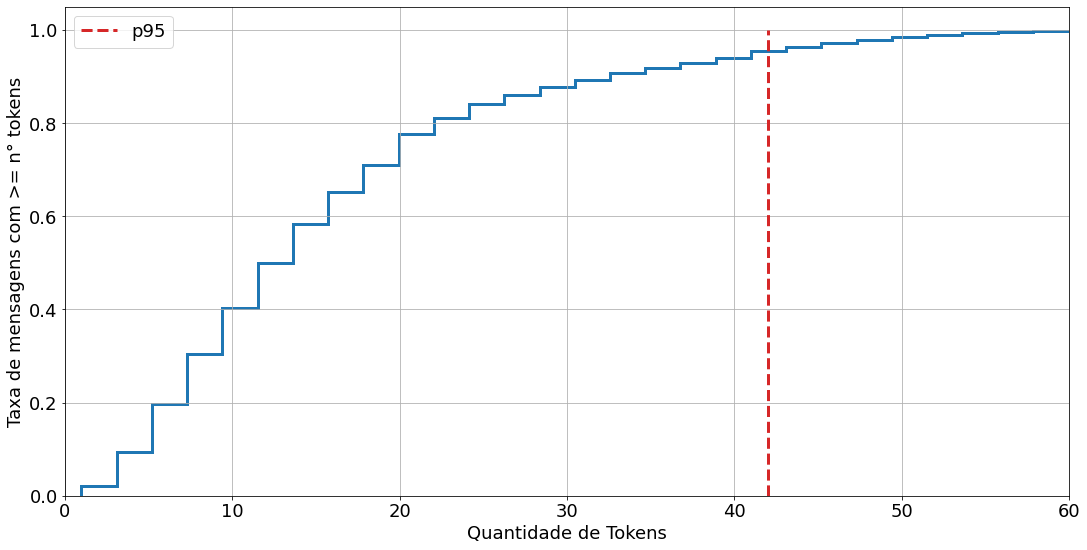

In [26]:
plt.figure(figsize=(18,9))
plt.hist(seq_len, bins=200, density=True, cumulative=True, label='', linewidth=3, histtype='step', color='#1f77b4')
plt.vlines(int(np.percentile(seq_len, 95)), ymin=0, ymax=1, linewidth=3, linestyles='dashed', label='p95', colors='#d62728')
plt.xlim((0, 60))
plt.legend(loc='upper left')
plt.xlabel("Quantidade de Tokens")
plt.ylabel("Taxa de mensagens com >= n° tokens")
plt.grid(which="both")
plt.show()